<a href="https://colab.research.google.com/github/Roberto-Ulises-Cruz-Olivares/EDPI/blob/main/Membrana_rectangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \left(
\frac{\partial^2 u}{\partial x^2} +
\frac{\partial^2 u}{\partial y^2} \right)
$$

con condiciones de frontera

$$
u = 0
$$

y las dos condiciones iniciales

Desplazamiento inicial:
$$
u(x, y, 0) = f(x, y)
$$

Velocidad inicial:
$$
\frac{\partial u}{\partial t}(x, y, 0) = g(x, y) = 0
$$

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [36]:
# Numero de terminos de la serie de fourier
M = 5
N = 5

$$
B{mn} = \frac{4}{ab \lambda{mn}} \int_0^b \int_0^a g(x, y) \sin\left( \frac{m\pi x}{a} \right) \sin\left( \frac{n\pi y}{b} \right) dx\,dy
$$

$$
\text{donde } m = 1, 2, \ldots \quad \text{y} \quad n = 1, 2, \ldots
$$

In [ ]:
# Coeficientes Bmn
def B_mn(m, n):
    if m == 1 and n == 1: #tomamos bmn 1 por ortogonalidad
        return 1
    else:
        return 0

### Lambda (pagina 130)
$$
\lambda = \lambda_{mn} = c \pi \sqrt{ \frac{m^2}{a^2} + \frac{n^2}{b^2} }, \quad m = 1, 2, \ldots,\quad n = 1, 2, \ldots
$$

In [37]:
# Definimos parametros para nuestro lamda_mn
a = 1
b = 1
c = 1
T = 2

# Lambda_mn
def lambda_mn(m, n):
    return c * np.pi * np.sqrt((m/a)*2 + (n/b)*2)

### Expansión de la solución por series de Fourier (Pagina 132)

La solución general de la ecuación de onda bidimensional con condiciones de frontera homogéneas está dada por:

#### (17)
$$
u(x, y, t) = \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} u_{mn}(x, y, t)
= \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} \left( B_{mn} \cos(\lambda_{mn} t) + B_{mn}^* \sin(\lambda_{mn} t) \right)
\sin\left(\frac{m\pi x}{a}\right) \sin\left(\frac{n\pi y}{b}\right)
$$

A partir de esta expresión, para t = 0 se tiene:

#### (18)
$$
u(x, y, 0) = \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} B_{mn}
\sin\left(\frac{m\pi x}{a}\right) \sin\left(\frac{n\pi y}{b}\right) = f(x, y)
$$

In [38]:
# Solución u(x, y, t)
def u_xtyt(x, y, t):
    total = 0
    for m in range(1, M+1):
        for n in range(1, N+1):
            B = B_mn(m, n)
            lmbd = lambda_mn(m, n)
            term = B * np.cos(lmbd * t) * np.sin(m * np.pi * x / a) * np.sin(n * np.pi * y / b)
            total += term
    return total

### Graficando

In [39]:
# Parametros para mi grafica

Nx, Ny = 50, 50
Nt = 200

x = np.linspace(0, a, Nx) # Dominio
y = np.linspace(0, b, Ny) # Contradominio
t = np.linspace(0, T, Nt) # Tiempo
X, Y = np.meshgrid(x, y)  # Mesh

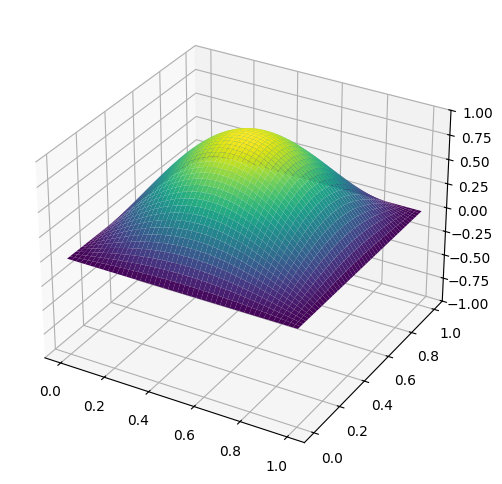

In [40]:
# Graficando en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-1, 1)
frames = [u_xtyt(X, Y, ti) for ti in t]
surf = [ax.plot_surface(X, Y, frames[0], cmap='viridis')]

def update_plot(frame):
    ax.clear()
    ax.set_zlim(-1, 1)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("u(x, y, t)")
    return ax.plot_surface(X, Y, frame, cmap='viridis')
plt.show()